# Actividad 2: Validación y evaluación en regresión y clasificación

Esta segunda actividad consiste en demostrar los conocimientos sobre validación y evaluación de algoritmos en aprendizaje supervisado, haciendo uso de los conceptos aprendidos en la asignatura.

Información general:
* La entrega consistirá en un archivo .ipynb siguiendo las instrucciones de este notebook.
* 60% de la nota final.

Instrucciones para cumplimentar el notebook:
* Descarga este notebook, que servirá como base para la entrega.
* **No hay que modificar las celdas** que vienen en la hoja de actividades, **a no ser que se especifique claramente en la celda**. Para contestar a las preguntas, por favor añade celdas inmediatamente después de cada pregunta.
* Para la nota se valorará tanto la consecución de la respuesta adecuada como el estilo y adecuación del código fuente (si procede responder con código), así como la inclusión de comentarios apropiados.
* **No está permitido compartir los resultados de una actividad** en el foro o con cualquier compañero, **salvo indicación expresa en el enunciado de la actividad**. Hacerlo puede suponer suspender la asignatura y enfrentarse a medidas disciplinarias.

Información útil:
* Para crear celdas en el notebook, usa el botón "+" del menú situado en la esquina superior izquierda.
* Para ejecutar una celda (texto o código), pulsa el botón "Run" del menú situado en la esquina superior izquierda.
* Recuerda cambiar el tipo de celda de forma adecuada con el menú superior.
* Más información sobre notebooks en la documentación oficial: https://jupyter.readthedocs.io/en/latest/

In [1]:
#Importamos las diferentes librerías
#General
import numpy as np
import sys

#Para metricas algoritmos y datasets
from sklearn import datasets,metrics,linear_model
from sklearn.dummy import DummyRegressor,DummyClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

#Para crear dataframes y crear graficas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Cargamos las diferentes datasets que vamos a necesitar
dataset = {
    'Iris': datasets.load_iris(),
    'Boston': datasets.load_boston(),
    'Cancer': datasets.load_breast_cancer(),
    'Diabetes': datasets.load_diabetes(),
    'Casas': datasets.fetch_california_housing(),
    'Caras': datasets.fetch_lfw_pairs()
}

In [3]:
#Cargamoos las metricas que vamos a necesitar
metricas = {
    'MAE':  metrics.mean_absolute_error,
    'RMSE': metrics.mean_squared_error,
    'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100,
    #'Accuracy': metrics.accuracy_score
}

In [4]:
#Cargamos los algoritmos que vamos a usar necesitar
algoritmos = {
    'OLS':linear_model.LinearRegression(),
    'KNN': KNeighborsRegressor(n_neighbors = 10),
}

### Ejercicio 1 (1.5 puntos)

Cree un programa que permita visualizar una gráfica en la que se muestren los valores de error MAE del regresor DummyRegressor en función del porcentaje de split training/test en validación Hold-out (pruebe desde un 50%-50% hasta un 95%-5%, de 5% en 5%) para un dataset de regresión (el que se desee).

MAE para cada porcentaje de test ->  [0.7242666666666667, 0.7263271162123386, 0.7055555555555556, 0.6866368410815016, 0.7352380952380951, 0.7203947368421053, 0.7027777777777777, 0.6162273194111606, 0.6133333333333333, 0.5]


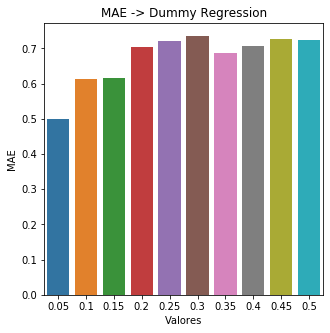

In [5]:
results = []
porcentajesTest=[0.50,0.45,0.40,0.35,0.30,0.25,0.20,0.15,0.10,0.05]

#Algoritmo de apredizaje -> DummyRegressor
reg = DummyRegressor()

#Aplica el algoritmo previamente especificado.
for pTest in porcentajesTest:
    #Aplica la diferenciacion de test y entrenamiento para los intervalos dados
    X_train, X_test, y_train, y_test = train_test_split(dataset['Iris'].data, dataset['Iris'].target, test_size=pTest, random_state=42)
    #Entrena y evalua el algoritmo previamente definido
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    #Introduce en una lista el resultade de MAE
    results.append(metricas['MAE'](y_test, y_pred))

imp = pd.DataFrame({'MAE':results, 'Valores':porcentajesTest})

plt.figure(figsize=(5,5))
sns.barplot(x = 'Valores', y = 'MAE', data = imp).set_title('MAE -> Dummy Regression')
print('MAE para cada porcentaje de test -> ',results)

### Ejercicio 2 (1.5 puntos)

Realizar el mismo procedimiento que el descrito en el Ejercicio 1, pero para clasificación con el clasificador DummyClassifier (visualizar gráfica de valores de exactitud, en lugar de MAE).

Accuracy para cada porcentaje de test ->  [0.656140350877193, 0.6498054474708171, 0.6491228070175439, 0.645, 0.631578947368421, 0.6223776223776224, 0.6228070175438597, 0.627906976744186, 0.7017543859649122, 0.6206896551724138]


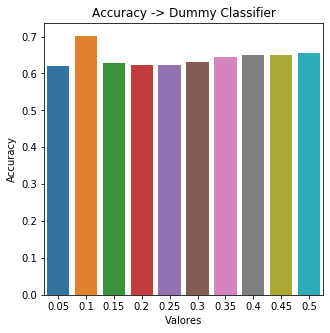

In [6]:
results = []
porcentajesTest=[0.50,0.45,0.40,0.35,0.30,0.25,0.20,0.15,0.10,0.05]

#Algoritmo de apredizaje -> DummyRegressor
clf = DummyClassifier(strategy="most_frequent")

#Aplica el algoritmo previamente especificado.
for pTest in porcentajesTest:
    #Aplica la diferenciacion de test y entrenamiento para los intervalos dados
    X_train, X_test, y_train, y_test = train_test_split(dataset['Cancer'].data, dataset['Cancer'].target, test_size=pTest, random_state=42)
    #Entrena y evalua el algoritmo previamente definido
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    #Introduce en una lista el resultade de MAE
    results.append(metrics.accuracy_score(y_test, y_pred))

imp = pd.DataFrame({'Accuracy':results, 'Valores':porcentajesTest})

plt.figure(figsize=(5,5))
sns.barplot(x = 'Valores', y = 'Accuracy', data = imp).set_title('Accuracy -> Dummy Classifier')
print('Accuracy para cada porcentaje de test -> ',results)

### Ejercicio 3 (2 puntos)

Cree un programa, con comentarios que aclaren el código, donde se computen las métricas MAE, RMSE y MAPE usando los regresores OLS y KNN en validación cruzada con 10 bolsas. Muestre los resultados de forma comparativa para al menos tres datasets (los que se deseen).

In [7]:
#Definimos los problemas que debemos solucionar
problemas = {
    'BostonOLS': (algoritmos['OLS'], dataset['Boston']),
    'BostonKNN': (algoritmos['KNN'], dataset['Boston']),
    'DiabetesOLS': (algoritmos['OLS'], dataset['Diabetes']),
    'DiabetesKNN': (algoritmos['KNN'], dataset['Diabetes']),
    'CasasKNN': (algoritmos['KNN'], dataset['Casas']),
    'CasasOLS': (algoritmos['OLS'], dataset['Casas']),
}

In [8]:
#Funcion que calcula las predicciones en funcion del crossValidation para los diferentes problemas planteados
#Esta funcion se reutiliza en todo el script
def calculaPredicciones():
    y_pred={}
    for nombre, valores in problemas.items():
        y_pred[nombre] = cross_val_predict(valores[0], valores[1].data, valores[1].target, cv=KFold(n_splits=10,random_state=42,shuffle=True))
    return  y_pred
    
#Definición de la función de evaluación que se empleará a partir de ahora para calcular las métricas de cada problema.
#Esta funcion se reutiliza en todo el script
def evaluacion(y_true, y_pred, metricas):
    result = {}
    for nombre, funcion in metricas.items():
        result[nombre] = funcion(y_true, y_pred)
    return result

In [9]:
#Se calculan las predicciones para los problemas planteados para los diferentes datasets
y_pred = calculaPredicciones()

#Se evaluan las metricas planteadas en el diccionario
evaluation={}
for nombre, exp in problemas.items():
       evaluation[nombre] = evaluacion(exp[1].target, y_pred[nombre], metricas)

#Se introducen las metricas en un dataframe y se imprime
evaluacion_resultados=pd.DataFrame(evaluation)
evaluacion_resultados

,BostonOLS,BostonKNN,DiabetesOLS,DiabetesKNN,CasasKNN,CasasOLS
MAE,3.376471,4.661423,44.473175,46.545249,0.811329,0.532031
RMSE,23.369919,44.194913,3022.915635,3395.342036,1.101792,0.532527
MAPE,17.016846,22.316646,39.786182,40.893173,52.781138,31.782659


### Ejercicio 4 (3 puntos)

Analice las diferencias entre los errores producidos por el algoritmo KNN en función de estos aspectos: a) número de vecinos más cercanos; b) función de distancia; c) con/sin normalización previa de atributos. Para ello, pruebe al menos dos configuraciones distintas de cada aspecto. Use tres datasets diferentes en validación leave-one-out en la comparativa de resultados.

##### a) Número de vecinos más cercanos: 
- Con 2 vecinos más cercanos
- Con 4 vecinos más cercanos
- Con 8 vecinos más cercanos
- Con 12 vecinos más cercanos

In [10]:
algoritmos = {
  'KNN_N2': KNeighborsRegressor(n_neighbors = 2),
  'KNN_N4': KNeighborsRegressor(n_neighbors = 4),
  'KNN_N8': KNeighborsRegressor(n_neighbors = 8),
  'KNN_N12': KNeighborsRegressor(n_neighbors = 12)
}

In [11]:
problemas = {
  'KNN2Boston': (algoritmos['KNN_N2'], dataset['Boston']),
  'KNN4Boston': (algoritmos['KNN_N4'], dataset['Boston']),
  'KNN8Boston': (algoritmos['KNN_N8'], dataset['Boston']),
  'KNN12Boston': (algoritmos['KNN_N12'], dataset['Boston']),
  'KNN2Diabetes': (algoritmos['KNN_N2'], dataset['Diabetes']),
  'KNN4Diabetes': (algoritmos['KNN_N4'], dataset['Diabetes']),
  'KNN8Diabetes': (algoritmos['KNN_N8'], dataset['Diabetes']),
  'KNN12Diabetes': (algoritmos['KNN_N12'], dataset['Diabetes']),
  'KNN2Casas': (algoritmos['KNN_N2'], dataset['Casas']),
  'KNN4Casas': (algoritmos['KNN_N4'], dataset['Casas']),
  'KNN8Casas': (algoritmos['KNN_N8'], dataset['Casas']),
  'KNN12Casas': (algoritmos['KNN_N12'], dataset['Casas'])  
}

In [12]:
#Se calculan las predicciones para los problemas planteados para los diferentes datasets
y_pred = calculaPredicciones()

#Se evaluan las metricas planteadas en el diccionario
evaluation={}
for nombre, exp in problemas.items():
       evaluation[nombre] = evaluacion(exp[1].target, y_pred[nombre], metricas)

#Se introducen las metricas en un dataframe y se imprime
evaluacion_resultados=pd.DataFrame(evaluation)
evaluacion_resultados

,KNN2Boston,KNN4Boston,KNN8Boston,KNN12Boston,KNN2Diabetes,KNN4Diabetes,KNN8Diabetes,KNN12Diabetes,KNN2Casas,KNN4Casas,KNN8Casas,KNN12Casas
MAE,4.517589,4.340366,4.492762,4.645669,50.361991,48.004525,47.107466,46.469268,0.845560,0.809299,0.808708,0.814136
RMSE,44.035158,39.389235,41.325336,45.118561,4342.084842,3768.072115,3479.413744,3397.601009,1.242360,1.118587,1.098199,1.107052
MAPE,21.053634,20.194596,21.404206,22.084053,42.516414,41.533860,40.985226,40.839635,52.835266,51.656780,52.400423,53.117620


##### b) Función de distancia:
- Con 4 vecinos más cercanos con hiperparámetro distancia
- Con 8 vecinos más cercanos con hiperparámetro distancia
- Con 12 vecinos más cercanos con hiperparámetro distancia

In [13]:
algoritmos = {
  'KNN_N8': KNeighborsRegressor(n_neighbors = 8),
  'KNN_N12': KNeighborsRegressor(n_neighbors = 12),
  'KNN_N8_DST': KNeighborsRegressor(n_neighbors = 8, weights='distance'),
  'KNN_N12_DST': KNeighborsRegressor(n_neighbors = 12, weights='distance')
}

In [14]:
problemas = {
  'KNN8Boston': (algoritmos['KNN_N8'], dataset['Boston']),
  'KNN12Boston': (algoritmos['KNN_N12'], dataset['Boston']),
  'KNN8DstBoston': (algoritmos['KNN_N8_DST'], dataset['Boston']),
  'KNN12DstBoston': (algoritmos['KNN_N12_DST'], dataset['Boston']),
  'KNN8Diabetes': (algoritmos['KNN_N8'], dataset['Diabetes']),
  'KNN12Diabetes': (algoritmos['KNN_N12'], dataset['Diabetes']),
  'KNN8DstDiabetes': (algoritmos['KNN_N8_DST'], dataset['Diabetes']),
  'KNN12DstDiabetes': (algoritmos['KNN_N12_DST'], dataset['Diabetes']),
  'KNN8Casas': (algoritmos['KNN_N8'], dataset['Casas']),
  'KNN12Casas': (algoritmos['KNN_N12'], dataset['Casas']),
  'KNN8DstCasas': (algoritmos['KNN_N8_DST'], dataset['Casas']),
  'KNN12DstCasas': (algoritmos['KNN_N12_DST'], dataset['Casas'])  
}

In [15]:
#Se calculan las predicciones para los problemas planteados para los diferentes datasets
y_pred = calculaPredicciones()

#Se evaluan las metricas planteadas en el diccionario
evaluation={}
for nombre, exp in problemas.items():
       evaluation[nombre] = evaluacion(exp[1].target, y_pred[nombre], metricas)

#Se introducen las metricas en un dataframe y se imprime
evaluacion_resultados=pd.DataFrame(evaluation)
evaluacion_resultados

,KNN8Boston,KNN12Boston,KNN8DstBoston,KNN12DstBoston,KNN8Diabetes,KNN12Diabetes,KNN8DstDiabetes,KNN12DstDiabetes,KNN8Casas,KNN12Casas,KNN8DstCasas,KNN12DstCasas
MAE,4.492762,4.645669,4.181809,4.275792,47.107466,46.469268,46.820020,46.183790,0.808708,0.814136,0.792598,0.796668
RMSE,41.325336,45.118561,36.595270,38.363438,3479.413744,3397.601009,3463.571818,3379.104243,1.098199,1.107052,1.061013,1.065935
MAPE,21.404206,22.084053,19.871814,20.359751,40.985226,40.839635,40.699512,40.522115,52.400423,53.117620,51.285804,51.906625


##### c) con/sin normalización previa de atributos:
- Con 12 vecinos más cercanos y datos sin normalizar
- Con 12 vecinos más cercanos y datos normalizados

In [16]:
#Se inicia el objeto a usar en la normalizacion
normalizer = preprocessing.MinMaxScaler()

In [17]:
#Cargamos las diferentes datasets que vamos a necesitar
dataset = {
    'Boston': datasets.load_boston(),
    'BostonNorm': datasets.load_boston(),
    'Diabetes': datasets.load_diabetes(),
    'DiabetesNorm': datasets.load_diabetes(),
    'Casas': datasets.fetch_california_housing(),
    'CasasNorm': datasets.fetch_california_housing()
}

#Modificas los datos para normalizarlos en los datasets que hacen falta
dataset['BostonNorm'].data = normalizer.fit_transform(dataset['BostonNorm'].data)
dataset['DiabetesNorm'].data = normalizer.fit_transform(dataset['DiabetesNorm'].data)
dataset['CasasNorm'].data = normalizer.fit_transform(dataset['CasasNorm'].data)

In [18]:
algoritmos = {
  'KNN_N12_DST': KNeighborsRegressor(n_neighbors = 12, weights='distance')
}

In [19]:
problemas = {
  'KNN12DstBoston': (algoritmos['KNN_N12_DST'], dataset['Boston']),
  'KNN12DstBostonNorm': (algoritmos['KNN_N12_DST'], dataset['BostonNorm']),
  'KNN12DstDiabetes': (algoritmos['KNN_N12_DST'], dataset['Diabetes']),
  'KNN12DstDiabetesNorm': (algoritmos['KNN_N12_DST'], dataset['DiabetesNorm']),
  'KNN12DstCasas': (algoritmos['KNN_N12_DST'], dataset['Casas']),
  'KNN12DstCasasNorm': (algoritmos['KNN_N12_DST'], dataset['CasasNorm'])  
}

In [20]:
#Se calculan las predicciones para los problemas planteados para los diferentes datasets
y_pred = calculaPredicciones()

#Se evaluan las metricas planteadas en el diccionario
evaluation={}
for nombre, exp in problemas.items():
       evaluation[nombre] = evaluacion(exp[1].target, y_pred[nombre], metricas)

#Se introducen las metricas en un dataframe y se imprime
evaluacion_resultados=pd.DataFrame(evaluation)
evaluacion_resultados

,KNN12DstBoston,KNN12DstBostonNorm,KNN12DstDiabetes,KNN12DstDiabetesNorm,KNN12DstCasas,KNN12DstCasasNorm
MAE,4.275792,3.116698,46.183790,45.867621,0.796668,0.410073
RMSE,38.363438,23.484063,3379.104243,3330.345591,1.065935,0.370659
MAPE,20.359751,14.165072,40.522115,40.085910,51.906625,22.060938


### Ejercicio 5 (2 puntos)

Estudie la métrica para clasificación denominada AUC de scikit-learn y cree un programa, con comentarios que aclaren el código, donde se compute diche métrica (junto con exactitud, precisión, recall y F1) usando los clasificadores LOGR y CART en validación cruzada leave-one-out. Muestre los resultados de forma comparativa para al menos tres datasets (los que se deseen).

In [21]:
#Cargamoos las metricas que vamos a necesitar
metricas = {
    'Accuracy': metrics.accuracy_score,
    'Precission': metrics.precision_score,
    'Recall': metrics.precision_score,
    'F1': metrics.f1_score,
    'AUC': metrics.auc,
}

In [22]:
#Cargamos las diferentes datasets que vamos a necesitar
dataset = {
    'Iris': datasets.load_iris(),
    'Diabetes': datasets.load_diabetes(),
    'Wine': datasets.load_wine(),
    #'Boston': datasets.load_boston(),
}

In [23]:
algoritmos = {
    'RLOG': LogisticRegression(solver='sag', max_iter=1000, random_state=42, multi_class='ovr'),
    'TREE': DecisionTreeClassifier(random_state=0)
}

In [24]:
problemas = {
  'TREEIris': (algoritmos['TREE'], dataset['Iris']),
  'RLOGIris': (algoritmos['RLOG'], dataset['Iris']),
  'TREEDiabetes': (algoritmos['TREE'], dataset['Diabetes']),
  'RLOGDiabetes': (algoritmos['RLOG'], dataset['Diabetes']),
  'TREEWine': (algoritmos['TREE'], dataset['Wine']),
  'RLOGWine': (algoritmos['RLOG'], dataset['Wine'])
}

In [25]:
#Se redefine la funcion para incluir el parametro average='weighted'
#Tambien se añaden los parametros para estudiar la metrica AUC
def evaluacion(y_true, y_pred, metricas):
    result = {}
    for nombre, funcion in metricas.items():
        if(nombre == 'Accuracy'):
            result[nombre] = funcion(y_true, y_pred)
        elif(nombre == 'AUC'):
            fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=2)
            result[nombre] = metrics.auc(fpr, tpr)
        else:
            result[nombre] = funcion(y_true, y_pred,average='weighted')
    return result

In [26]:
#Se calculan las predicciones para los problemas planteados para los diferentes datasets
y_pred = calculaPredicciones()

#Se evaluan las metricas planteadas en el diccionario
evaluation={}
for nombre, exp in problemas.items():
       evaluation[nombre] = evaluacion(exp[1].target, y_pred[nombre], metricas)

#Se introducen las metricas en un dataframe y se imprime
evaluacion_resultados=pd.DataFrame(evaluation)
evaluacion_resultados

,TREEIris,RLOGIris,TREEDiabetes,RLOGDiabetes,TREEWine,RLOGWine
Accuracy,0.946667,0.940000,0.006787,0.004525,0.882022,0.803371
Precission,0.946667,0.940988,0.005581,0.000138,0.883552,0.836663
Recall,0.946667,0.940988,0.005581,0.000138,0.883552,0.836663
F1,0.946667,0.939946,0.006083,0.000267,0.882437,0.792453
AUC,0.960000,0.955000,NaN,NaN,0.951122,0.799038
